# Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import pingouin as pg
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, normaltest

import pandas as pd
import scipy.stats as stats
import pandas as pd
import scikit_posthocs as sp

# Load and organize data

In [ ]:
# read data

data = pd.read_csv('../csv/fig2_attentionclassification.csv')
data.head(n=3)

,Unnamed: 0,Schema-network-Schema-attn,Schema-network-Control-attn,Control-network-Schema-attn,Control-network-Control-attn
0,0,70.394737,55.921053,53.289474,46.052632
1,1,89.473684,57.236842,80.263158,46.052632
2,2,86.842105,53.289474,69.736842,47.368421


In [ ]:
d = pd.DataFrame(data[['Schema-network-Schema-attn','Schema-network-Control-attn',
                  'Control-network-Schema-attn','Control-network-Control-attn']].stack())

plot_d = d.reset_index()[['level_1',0]]
plot_d['Network pair'] = plot_d['level_1']
plot_d['Discrimination accuracy'] = plot_d[0]

plot_d.head(n=3)

,level_1,0,Network pair,Discrimination accuracy
0,Schema-network-Schema-attn,70.394737,Schema-network-Schema-attn,70.394737
1,Schema-network-Control-attn,55.921053,Schema-network-Control-attn,55.921053
2,Control-network-Schema-attn,53.289474,Control-network-Schema-attn,53.289474


In [ ]:
means = pd.DataFrame(plot_d.groupby('Network pair',as_index=False)['Discrimination accuracy'].mean())
means

,Network pair,Discrimination accuracy
0,Control-network-Control-attn,52.777778
1,Control-network-Schema-attn,70.614035
2,Schema-network-Control-attn,54.580897
3,Schema-network-Schema-attn,80.872320


In [ ]:
plot_d['attention_net']      = np.nan
plot_d['discrimination_net'] = np.nan

plot_d.loc[plot_d['level_1'].isin(['Schema-network-Schema-attn',
                                   'Schema-network-Control-attn']), 'discrimination_net']='Schema'

plot_d.loc[plot_d['level_1'].isin(['Control-network-Schema-attn',
                                   'Control-network-Control-attn']), 'discrimination_net']='Control'

plot_d.loc[plot_d['level_1'].isin(['Schema-network-Schema-attn',
                                   'Control-network-Schema-attn']), 'attention_net']='Schema'

plot_d.loc[plot_d['level_1'].isin(['Schema-network-Control-attn',
                                   'Control-network-Control-attn']), 'attention_net']='Control'

plot_d.head(n=5)

,level_1,0,Network pair,Discrimination accuracy,attention_net,discrimination_net
0,Schema-network-Schema-attn,70.394737,Schema-network-Schema-attn,70.394737,Schema,Schema
1,Schema-network-Control-attn,55.921053,Schema-network-Control-attn,55.921053,Control,Schema
2,Control-network-Schema-attn,53.289474,Control-network-Schema-attn,53.289474,Schema,Control
3,Control-network-Control-attn,46.052632,Control-network-Control-attn,46.052632,Control,Control
4,Schema-network-Schema-attn,89.473684,Schema-network-Schema-attn,89.473684,Schema,Schema


# Plot the data

In [ ]:
plot_d['Network pair']

order = [
    'Schema-network-Schema-attn' , 'Control-network-Schema-attn',
    'Schema-network-Control-attn', 'Control-network-Control-attn'
        ]

/var/folders/93/wc556zmn0vl9gns07tz1_8x80000gn/T/ipykernel_36356/2110597793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.violinplot(x='Network pair', y='Discrimination accuracy', data=plot_d, order=order, palette='Greens_r')


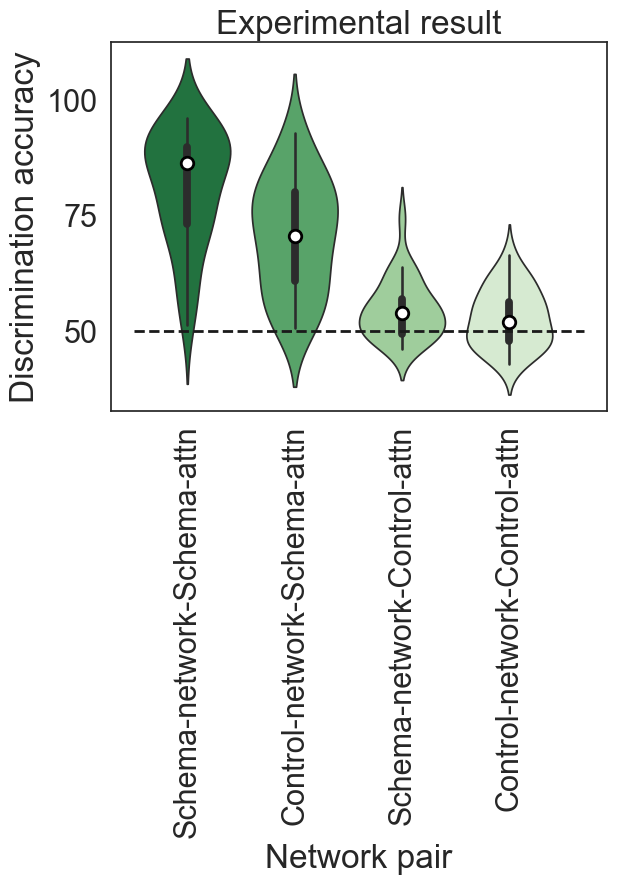

In [ ]:
sb.set(font_scale=2)
sb.set_style('white')

ax = sb.violinplot(x='Network pair', y='Discrimination accuracy', data=plot_d, order=order, palette='Greens_r')
ax.set_yticks([50, 75, 100])

median_list = []
for o in order:
    median_list.append(plot_d[plot_d['Network pair']==o]['Discrimination accuracy'].median())

ax2 = sb.swarmplot(x=order, y=median_list, size=9, color='white', edgecolor="black", linewidth=2)
ax2.set_yticks([50, 75, 100])

ax.hlines(y=50,xmin=-.5, xmax=3.7, linestyle='--', color='k', linewidth=2)

ax.set_title('Experimental result')

plt.xticks(rotation=90)

plt.savefig('../figures/Fig2b.pdf',bbox_inches='tight')

## ANOVA (discrimination_net x attention_net)

In [ ]:
plot_d.anova(dv='Discrimination accuracy', between=['discrimination_net','attention_net'])

,Source,SS,DF,MS,F,p-unc,np2
0,discrimination_net,981.972819,1,981.972819,10.173994,1.882821e-03,0.089110
1,attention_net,13143.952146,1,13143.952146,136.181462,1.288828e-20,0.566994
2,discrimination_net * attention_net,482.556331,1,482.556331,4.999655,2.748843e-02,0.045869
3,Residual,10037.864215,104,96.517925,NaN,NaN,NaN


### Follow up t-test #1

In [ ]:
stats.ttest_ind(plot_d[plot_d['discrimination_net']=='Schema']['Discrimination accuracy'],
                plot_d[plot_d['discrimination_net']=='Control']['Discrimination accuracy'])

Ttest_indResult(statistic=2.097273974626951, pvalue=0.0383476781619169)

In [ ]:
pg.ttest(plot_d[plot_d['discrimination_net']=='Schema']['Discrimination accuracy'],
                plot_d[plot_d['discrimination_net']=='Control']['Discrimination accuracy'])

/Users/kirstenziman/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/kirstenziman/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.097274,106,two-sided,0.038348,"[0.33, 11.73]",0.403621,1.429,0.547106


### Follow up t-test #2

In [ ]:
stats.ttest_ind(plot_d[plot_d['attention_net']=='Schema']['Discrimination accuracy'],
                plot_d[plot_d['attention_net']=='Control']['Discrimination accuracy'])

Ttest_indResult(statistic=11.005804889576227, pvalue=3.021450767221695e-19)

In [ ]:
stats.ttest_ind(plot_d[plot_d['attention_net']=='Schema']['Discrimination accuracy'],
            plot_d[plot_d['attention_net']=='Control']['Discrimination accuracy'])

Ttest_indResult(statistic=11.005804889576227, pvalue=3.021450767221695e-19)